# Modeling: K Nearest Neighbor

### Importing Libraries

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import _pickle as pickle

### Loading in the Data

In [51]:
with open("final_df.pickle",'rb') as fp:
    final_df = pickle.load(fp)

## Preparing the Data

In [52]:
# Assigning appropriate variables for modeling
X = final_df.drop('price_will_increase?', axis=1)
y = final_df['price_will_increase?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### Scaling Data
Standardize features by removing the mean and scaling to unit variance

In [53]:
def scaling(X_train, X_test):
    scaler = StandardScaler()
    scaled_data_train = scaler.fit_transform(X_train)
    scaled_data_test = scaler.transform(X_test)

    return scaled_data_train, scaled_data_test

X_train, X_test = scaling(X_train, X_test)

### Function to measure a model's results

In [54]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))

#### Function for plotting the Confusion Matrix

In [91]:
def plot_confusion_matrix(y_true, y_pred, labels=[False, 'Price up > 5%'], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling - K Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
k_clf = KNeighborsClassifier()
k_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Results from KNN

In [77]:
# Predictions from KNN
y_pred = k_clf.predict(X_test)

print_metrics(y_test, y_pred)

Precision Score: 0.5854922279792746
Recall Score: 0.6208791208791209
Accuracy Score: 0.5814606741573034
F1 Score: 0.6026666666666668


In [78]:
# Area under the curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:", round(roc_auc, 4))

AUC: 0.5806


In [79]:
# Confusion Matrix
print("Confusion Matrix \n-----------------")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Confusion Matrix 
-----------------


Predicted,False,True,All
Actual,,,
False,94,80,174
True,69,113,182
All,163,193,356


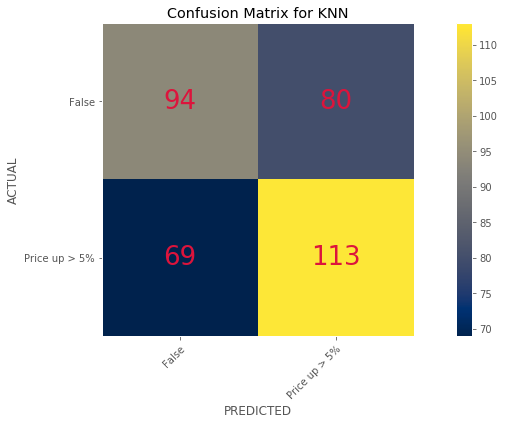

In [80]:
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix for KNN")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

### KNN - Accuracy: 58.14% and F1 Score: 60.26%.

### Using GridSearch to improve KNN

In [60]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [61]:
# Using Cross Validation
k_clf = KNeighborsClassifier()
k_cv_score = cross_val_score(k_clf, X, y, cv=3)
mean_k_cv_score = np.mean(k_cv_score)

print("Mean Cross Validation Score:", mean_k_cv_score*100)

Mean Cross Validation Score: 52.077077077077085


In [63]:
k_param_grid = {'n_neighbors': [1, 5, 9, 21, 25],
                 'weights': ['uniform', 'distance'],
                 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                 'leaf_size': [1, 5, 15],
                 'metric': ['minkowski', 'euclidean']}

#### Finding the best parameters for KNN

In [64]:
k_grid_search = GridSearchCV(k_clf, k_param_grid, cv=3, return_train_score=True, verbose=5)
k_grid_search.fit(X, y)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=uniform, score=0.5538720538720538, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=uniform, score=0.5757575757575758, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=uniform, score=0.5506756756756757, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=distance 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=distance, score=0.5538720538720538, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=distance, score=0.5757575757575758, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=distance 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=1, weights=distance, score=0.5506756756756757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform, score=0.5235690235690236, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform, score=0.531986531986532, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform, score=0.5067567567567568, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=5, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, metric=minkowski, n_neighbors=5, weights=distance, score=0.5235690235690236, total=

[CV]  algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=uniform, score=0.5202020202020202, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=uniform, score=0.5067567567567568, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance, score=0.5202020202020202, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance, score=0.5202020202020202, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance, score=0.5067567567567568, to

[CV]  algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=21, weights=distance, score=0.5555555555555556, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=21, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=21, weights=distance, score=0.5202702702702703, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform, score=0.5303030303030303, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform, score=0.5538720538720538, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform, score=0.49493243243243

[CV]  algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=uniform, score=0.5757575757575758, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=uniform, score=0.5506756756756757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=distance, score=0.5538720538720538, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=distance, score=0.5757575757575758, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=15, metric=minkowski, n_neighbors=1, weights=distance, score=0.55067567567

[CV]  algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=5, weights=distance, score=0.5235690235690236, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=5, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=5, weights=distance, score=0.5353535353535354, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=5, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=5, weights=distance, score=0.5118243243243243, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=9, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=9, weights=uniform, score=0.5235690235690236, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=9, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=9, weights=uniform, score=0.520202020202

[CV]  algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=9, weights=distance, score=0.5067567567567568, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=21, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=21, weights=uniform, score=0.5303030303030303, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=21, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=21, weights=uniform, score=0.5454545454545454, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=21, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=21, weights=uniform, score=0.5135135135135135, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=21, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=1, metric=minkowski, n_neighbors=21, weights=distance, score=0.531986531986532, total=   0.5s
[C

[CV]  algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=uniform, score=0.5538720538720538, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=uniform, score=0.49493243243243246, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=distance, score=0.5370370370370371, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=distance, score=0.5707070707070707, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=1, metric=euclidean, n_neighbors=25, weights=distance, score=0.5067567567567568, total=   0

[CV]  algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=1, weights=distance, score=0.5538720538720538, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=1, weights=distance, score=0.5757575757575758, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=1, weights=distance, score=0.5506756756756757, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=5, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=5, weights=uniform, score=0.5235690235690236, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=5, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=5, metric=euclidean, n_neighbors=5, weights=uniform, score=0.531986531986532, total=   0.1s
[CV] alg

[CV]  algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=uniform, score=0.5235690235690236, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=uniform, score=0.5202020202020202, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=uniform, score=0.5067567567567568, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=distance, score=0.5202020202020202, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=15, metric=minkowski, n_neighbors=9, weights=distance, score=0.5202020202020202, total=   0.0s

[CV]  algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5135135135135135, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=21, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=21, weights=distance, score=0.531986531986532, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=21, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=21, weights=distance, score=0.5555555555555556, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=21, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=21, weights=distance, score=0.5202702702702703, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=25, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=15, metric=euclidean, n_neighbors=25, weights=uniform, score=0.5303030303030303, tot

[CV]  algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform, score=0.5538720538720538, total=   0.0s
[CV] algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform, score=0.5757575757575758, total=   0.0s
[CV] algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform, score=0.5506756756756757, total=   0.0s
[CV] algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=distance 
[CV]  algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=distance, score=0.5538720538720538, total=   0.0s
[CV] algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=distance 
[CV]  algorithm=brute, leaf_size=1, metric=euclidean, n_neighbors=1, weights=distance, score=0.5757575757575758, total=   0.0s
[CV] algorithm=brute, leaf

[CV]  algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=5, weights=distance, score=0.5235690235690236, total=   0.0s
[CV] algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=5, weights=distance 
[CV]  algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=5, weights=distance, score=0.5353535353535354, total=   0.0s
[CV] algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=5, weights=distance 
[CV]  algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=5, weights=distance, score=0.5118243243243243, total=   0.0s
[CV] algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=9, weights=uniform 
[CV]  algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=9, weights=uniform, score=0.5235690235690236, total=   0.0s
[CV] algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=9, weights=uniform 
[CV]  algorithm=brute, leaf_size=5, metric=minkowski, n_neighbors=9, weights=uniform, score=0.5202020202020202, total=   0.0s
[CV] algorithm=brute, lea

[CV]  algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5303030303030303, total=   0.0s
[CV] algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=uniform 
[CV]  algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5454545454545454, total=   0.0s
[CV] algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=uniform 
[CV]  algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5135135135135135, total=   0.0s
[CV] algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=distance 
[CV]  algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=distance, score=0.531986531986532, total=   0.0s
[CV] algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=distance 
[CV]  algorithm=brute, leaf_size=5, metric=euclidean, n_neighbors=21, weights=distance, score=0.5555555555555556, total=   0.0s
[CV] algorithm=bru

[CV]  algorithm=brute, leaf_size=15, metric=minkowski, n_neighbors=25, weights=distance, score=0.5707070707070707, total=   0.0s
[CV] algorithm=brute, leaf_size=15, metric=minkowski, n_neighbors=25, weights=distance 
[CV]  algorithm=brute, leaf_size=15, metric=minkowski, n_neighbors=25, weights=distance, score=0.5067567567567568, total=   0.0s
[CV] algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=1, weights=uniform, score=0.5538720538720538, total=   0.0s
[CV] algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=1, weights=uniform, score=0.5757575757575758, total=   0.0s
[CV] algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=15, metric=euclidean, n_neighbors=1, weights=uniform, score=0.5506756756756757, total=   0.0s
[CV] algorithm=

[CV]  algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform, score=0.531986531986532, total=   0.3s
[CV] algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=uniform, score=0.5067567567567568, total=   0.3s
[CV] algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=distance, score=0.5235690235690236, total=   0.4s
[CV] algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=distance, score=0.5353535353535354, total=   0.3s
[CV] algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=5, weights=distance, score=0.5118243243243243, total=   0.3s
[CV] algorithm=auto, leaf_size=1, 

[CV]  algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance, score=0.5202020202020202, total=   0.3s
[CV] algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance 
[CV]  algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=9, weights=distance, score=0.5067567567567568, total=   0.3s
[CV] algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=21, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5303030303030303, total=   0.6s
[CV] algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=21, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5454545454545454, total=   0.4s
[CV] algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=21, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5135135135135135, total=   0.4s
[CV] algorithm=auto, leaf_size

[CV]  algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform, score=0.5538720538720538, total=   0.1s
[CV] algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform 
[CV]  algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=uniform, score=0.49493243243243246, total=   0.1s
[CV] algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=distance 
[CV]  algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=distance, score=0.5370370370370371, total=   0.1s
[CV] algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=distance 
[CV]  algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=distance, score=0.5707070707070707, total=   0.1s
[CV] algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=distance 
[CV]  algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=25, weights=distance, score=0.5067567567567568, total=   0.1s
[CV] algorithm=auto, le

[CV]  algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=uniform, score=0.5235690235690236, total=   0.1s
[CV] algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=uniform 
[CV]  algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=uniform, score=0.531986531986532, total=   0.1s
[CV] algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=uniform 
[CV]  algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=uniform, score=0.5067567567567568, total=   0.1s
[CV] algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=distance, score=0.5235690235690236, total=   0.1s
[CV] algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=5, weights=distance, score=0.5353535353535354, total=   0.0s
[CV] algorithm=auto, leaf_s

[CV]  algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=9, weights=distance, score=0.5202020202020202, total=   0.0s
[CV] algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=9, weights=distance 
[CV]  algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=9, weights=distance, score=0.5067567567567568, total=   0.0s
[CV] algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=21, weights=uniform 
[CV]  algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5303030303030303, total=   0.1s
[CV] algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=21, weights=uniform 
[CV]  algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5454545454545454, total=   0.1s
[CV] algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=21, weights=uniform 
[CV]  algorithm=auto, leaf_size=15, metric=euclidean, n_neighbors=21, weights=uniform, score=0.5135135135135135, total=   0.1s
[CV] algorithm=auto, 

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 9, 21, 25], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'], 'leaf_size': [1, 5, 15], 'metric': ['minkowski', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=5)

In [65]:
k_gs_training_score = np.mean(k_grid_search.cv_results_['mean_train_score'])
k_gs_testing_score = k_grid_search.score(X, y)

print("Mean Training Score:", k_gs_training_score*100)
print("Mean Testing Score:", k_gs_testing_score*100)
print("Best Parameter Found:")
k_grid_search.best_params_

Mean Training Score: 85.718880769471
Mean Testing Score: 100.0
Best Parameter Found:


{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'weights': 'uniform'}

### Running KNN Model with GridSearch parameters

In [81]:
# Fitting and training KNN with new parameters
k_clf = k_grid_search.best_estimator_
k_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Results from KNN using GridSearch parameters

In [82]:
# Predictions from KNN
y_pred = k_clf.predict(X_test)

print_metrics(y_test, y_pred)

Precision Score: 0.5828571428571429
Recall Score: 0.5604395604395604
Accuracy Score: 0.5702247191011236
F1 Score: 0.5714285714285714


In [83]:
# Area under the curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:", round(roc_auc, 4))

AUC: 0.5704


In [84]:
# Confusion Matrix
print("Confusion Matrix \n-----------------")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Confusion Matrix 
-----------------


Predicted,False,True,All
Actual,,,
False,101,73,174
True,80,102,182
All,181,175,356


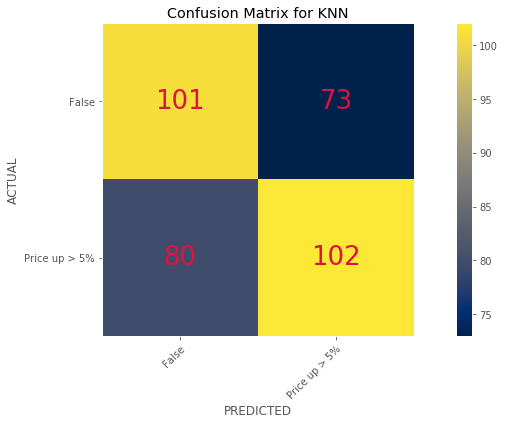

In [92]:
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix for KNN")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.savefig('KNNConMat.png')
plt.show()

### KNN (w/GridSearch) - Accuracy: 57.02% and F1 Score: 57.14%.